In [57]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
warnings.simplefilter('ignore')
#plt.figure(figsize=(25,10))

In [2]:
price = pd.read_csv(r"C:\Users\Ashis\Dropbox\My PC (LAPTOP-05U11M48)\Downloads\Cafe - Transaction - Store.csv",parse_dates=[1])
meta = pd.read_csv(r"C:\Users\Ashis\Dropbox\My PC (LAPTOP-05U11M48)\Downloads\Cafe - Sell Meta Data.csv")
date = pd.read_csv(r"C:\Users\Ashis\Dropbox\My PC (LAPTOP-05U11M48)\Downloads\DateInfo.csv",parse_dates=[0])

(5404, 6)

    STORE CALENDAR_DATE  PRICE  QUANTITY  SELL_ID  SELL_CATEGORY
0      1    2012-01-01  15.50        46     1070              0
1      1    2012-01-01  12.73        22     2051              2
2      1    2012-01-01  12.75        18     2052              2
3      1    2012-01-01  12.60        30     2053              2
4      1    2012-01-02  15.50        70     1070              0
5      1    2012-01-02  12.73        22     2051              2
6      1    2012-01-02  12.75        16     2052              2
ALL NUMS----- 
             Name  Miss         Mean   Median      Min     Max       StDev  Unique
0          PRICE     0    12.868729    12.64    10.12    16.5    1.563922      41
1       QUANTITY     0    44.335307    36.00     8.00   124.0   25.502597      58
2        SELL_ID     0  1806.500000  2051.50  1070.00  2053.0  425.258410       4
3  SELL_CATEGORY     0     1.500000     2.00     0.00     2.0    0.866106       2 

ALL DATES----- 
             Name  Miss         

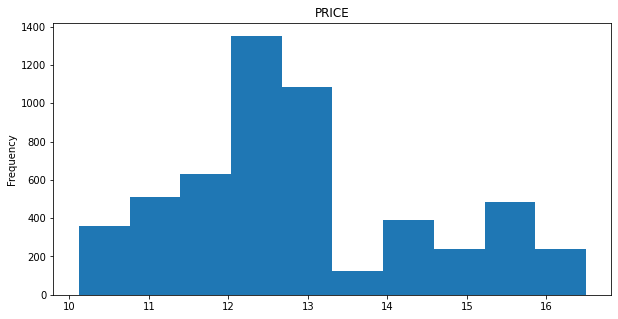

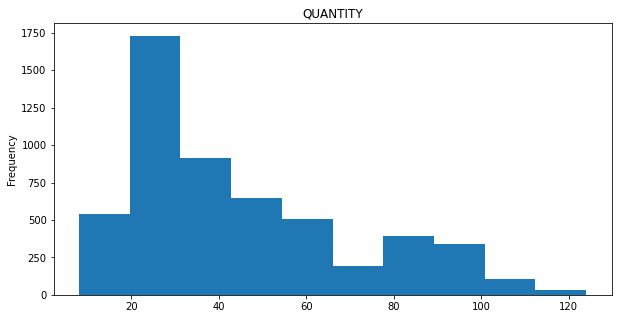

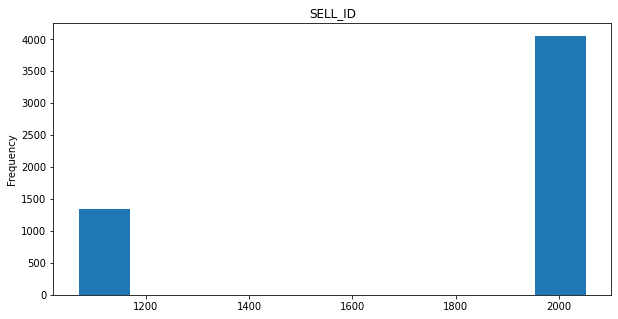

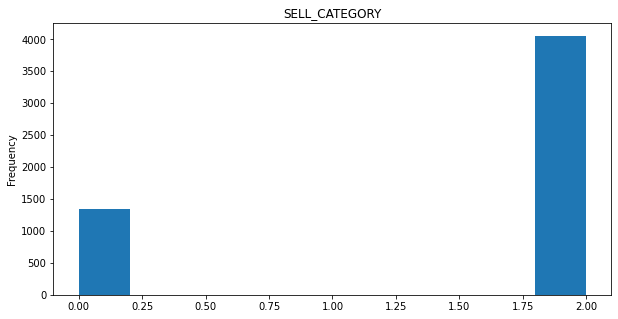

NEXT DATAFRAME INFO::::::::::::::::::::::
(11, 4)

    SELL_ID  SELL_CATEGORY  ITEM_ID ITEM_NAME
0     1070              0     7821    BURGER
1     3055              0     3052    COFFEE
2     3067              0     5030      COKE
3     3028              0     6249  LEMONADE
4     2051              2     7821    BURGER
5     2051              2     5030      COKE
6     2052              2     7821    BURGER
ALL NUMS----- 
             Name  Miss         Mean  Median   Min   Max        StDev  Unique
0        SELL_ID     0  2235.000000  2053.0  1070  3067   598.728653       7
1  SELL_CATEGORY     0     1.272727     2.0     0     2     1.009050       2
2        ITEM_ID     0  5906.909091  6249.0  3052  7821  1830.217170       4 

ALL DATES----- 
 Empty DataFrame
Columns: [Name, Miss, Mode, Unique]
Index: [] 

ALL OBJS----- 
         Name  Miss                       Mode  Unique
0  ITEM_NAME     0  0    BURGER
dtype: object       4 

OBJ VALUE COUNTS----- 
 [BURGER      4
COKE        3
LE

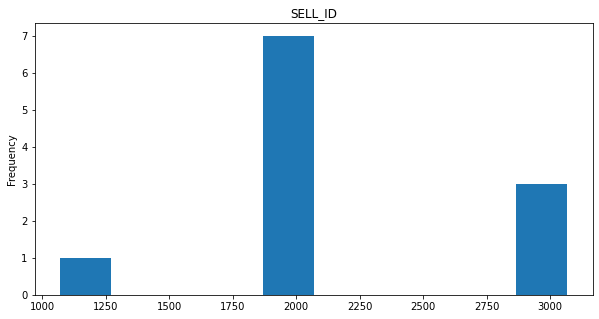

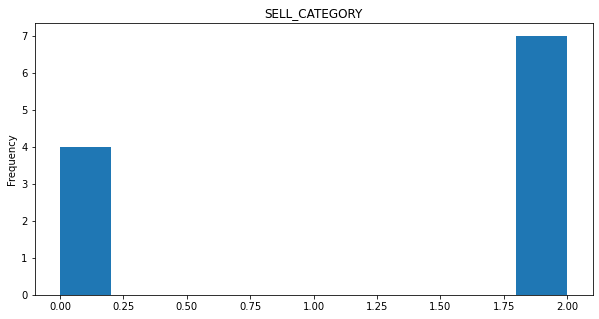

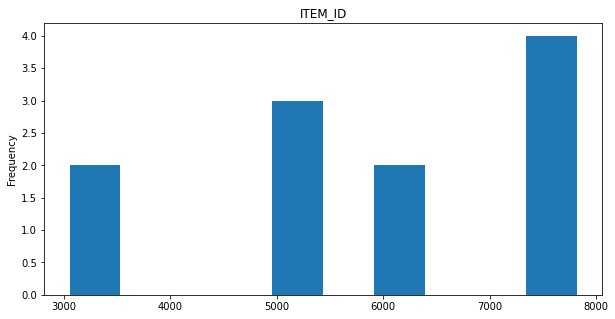

NEXT DATAFRAME INFO::::::::::::::::::::::
(1349, 7)

   CALENDAR_DATE  YEAR   HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR
0    2012-01-01  2012  New Year           1               0                 24.8           0
1    2012-01-02  2012  New Year           0               0                 24.8           0
2    2012-01-03  2012  New Year           0               0                 32.0           1
3    2012-01-04  2012       NaN           0               0                 32.0           1
4    2012-01-05  2012       NaN           0               0                 24.8           0
5    2012-01-06  2012       NaN           0               0                 23.0           0
6    2012-01-07  2012       NaN           1               0                 26.6           0
ALL NUMS----- 
                   Name  Miss         Mean  Median     Min     Max      StDev  Unique
0                 YEAR     0  2013.375093  2013.0  2012.0  2015.0   1.073073       4
1           IS_W

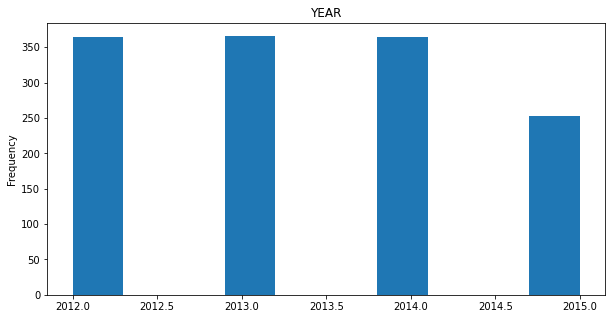

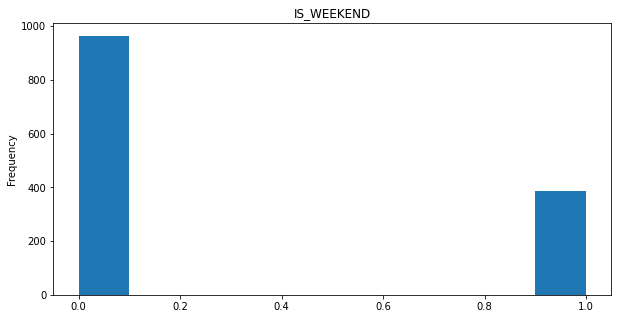

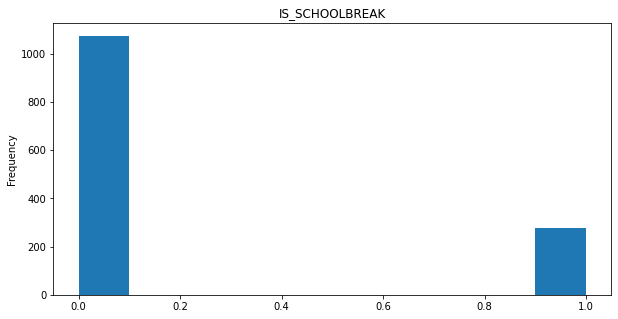

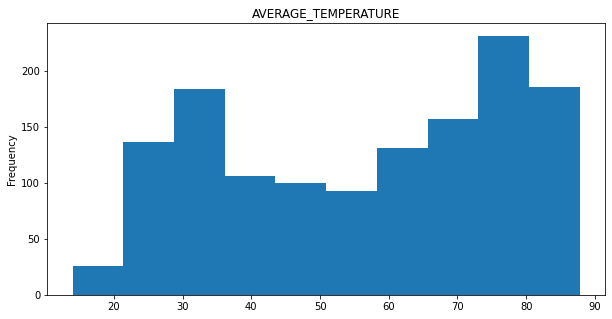

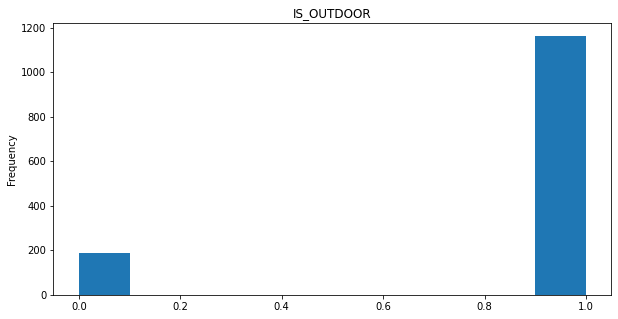

NEXT DATAFRAME INFO::::::::::::::::::::::


In [3]:
def dfinfo(*dfs):
    for df in dfs:
        print(df.shape)
        print('\n',df.head(7))
        
        num = df.select_dtypes('number')
        num = num.loc[:,[col for col in num if num[col].std()>0]]
        dates = df.select_dtypes('datetime64')
        obj = df.select_dtypes('object')
        
        print("ALL NUMS-----",'\n',pd.DataFrame([(col,num[col].isna().sum(),num[col].mean(),num[col].median(),num[col].min(),
                             num[col].max(),num[col].std(),num[col].nunique()) for col in num],
                            columns=['Name','Miss','Mean','Median','Min','Max','StDev','Unique']),'\n')
        print("ALL DATES-----",'\n',pd.DataFrame([(col,dates[col].isna().sum(),dates[col].mode(),dates[col].nunique())for col in dates],
                               columns=['Name','Miss','Mode','Unique']),'\n')
        print("ALL OBJS-----",'\n',pd.DataFrame([(col,obj[col].isna().sum(),obj[col].mode(),obj[col].nunique())for col in obj],
                               columns=['Name','Miss','Mode','Unique']),'\n')
        print("OBJ VALUE COUNTS-----",'\n',[obj[col].value_counts(dropna=False,ascending=False).head() for col in obj],'\n')
        print("DATE VALUE COUNTS-----",'\n',[dates[col].value_counts(dropna=False,ascending=False).head() for col in dates],'\n')
          
        for col in num:
            num[col].plot(kind='hist', figsize=(10,5),title=(col))
            plt.show()
    
        print("NEXT DATAFRAME INFO::::::::::::::::::::::")
        

dfinfo(price,meta,date)

In [7]:
it_pr = pd.merge(price,meta,how='left',on=['SELL_ID', 'SELL_CATEGORY'])
fin = pd.merge(it_pr,date,how='left',on='CALENDAR_DATE')
#print(fin[fin.duplicated(keep='first')])
#fin.groupby(['SELL_ID','SELL_CATEGORY','YEAR'])['QUANTITY'].sum()
fin.drop_duplicates(inplace=True)
fin['MONTH'] = fin['CALENDAR_DATE'].dt.strftime("%b") # or dt.month to get month numbers
fin['DAY'] = fin['CALENDAR_DATE'].dt.day # or strftime("%d")
fin['WEEK'] = fin['CALENDAR_DATE'].dt.strftime("%U") # %U for week nums starting SUN ; %W for week nums starting MON
fin['WEEKDAY'] = fin['CALENDAR_DATE'].dt.strftime("%a") # %A for full Weekday Names
fin['WEEKDAY'] = pd.Categorical(fin['WEEKDAY'], categories=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'], ordered=True)
#pt = fin[fin.CALENDAR_DATE=='2013-03-01']
#fin = fin[fin.CALENDAR_DATE!='2013-03-01']
#ptc = pt.groupby(['CALENDAR_DATE','SELL_ID','ITEM_NAME'])['QUANTITY','PRICE'].mean().reset_index()

#pt=pt.drop_duplicates(subset=pt.columns.drop('AVERAGE_TEMPERATURE'))
# pt.columns is an Index Object hence used Index.drop instead of list.remove
#ptc=ptc.set_index('CALENDAR_DATE').groupby(['CALENDAR_DATE','ITEM_NAME']).agg({'QUANTITY':'mean','PRICE':'mean'}).reset_index()

In [260]:
fin.head(20)

STORE CALENDAR_DATE  PRICE  QUANTITY  SELL_ID  SELL_CATEGORY  ITEM_ID ITEM_NAME  YEAR   HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR MONTH  DAY WEEK WEEKDAY
0       1    2012-01-01  15.50        46     1070              0     7821    BURGER  2012  New Year           1               0                 24.8           0   Jan    1   01     Sun
1       1    2012-01-01  12.73        22     2051              2     7821    BURGER  2012  New Year           1               0                 24.8           0   Jan    1   01     Sun
2       1    2012-01-01  12.73        22     2051              2     5030      COKE  2012  New Year           1               0                 24.8           0   Jan    1   01     Sun
3       1    2012-01-01  12.75        18     2052              2     7821    BURGER  2012  New Year           1               0                 24.8           0   Jan    1   01     Sun
4       1    2012-01-01  12.75        18     2052              2     6249  LEMONADE  2012  New Year           1               0                 24.8           0   Jan    1   01     Sun
5       1    2012-01-01  12.60        30     2053              2     7821    BURGER  2012  New Year           1               0                 24.8           0   Jan    1   01     Sun
6       1    2012-01-01  12.60        30     2053              2     5030      COKE  2012  New Year           1               0                 24.8           0   Jan    1   01     Sun
7       1    2012-01-01  12.60        30     2053              2     3052    COFFEE  2012  New Year           1               0                 24.8           0   Jan    1   01     Sun
8       1    2012-01-02  15.50        70     1070              0     7821    BURGER  2012  New Year           0               0                 24.8           0   Jan    2   01     Mon
9       1    2012-01-02  12.73        22     2051              2     7821    BURGER  2012  New Year           0               0                 24.8           0   Jan    2   01     Mon
10      1    2012-01-02  12.73        22     2051              2     5030      COKE  2012  New Year           0               0                 24.8           0   Jan    2   01     Mon
11      1    2012-01-02  12.75        16     2052              2     7821    BURGER  2012  New Year           0               0                 24.8           0   Jan    2   01     Mon
12      1    2012-01-02  12.75        16     2052              2     6249  LEMONADE  2012  New Year           0               0                 24.8           0   Jan    2   01     Mon
13      1    2012-01-02  12.60        34     2053              2     7821    BURGER  2012  New Year           0               0                 24.8           0   Jan    2   01     Mon
14      1    2012-01-02  12.60        34     2053              2     5030      COKE  2012  New Year           0               0                 24.8           0   Jan    2   01     Mon
15      1    2012-01-02  12.60        34     2053              2     3052    COFFEE  2012  New Year           0               0                 24.8           0   Jan    2   01     Mon
16      1    2012-01-03  15.50        62     1070              0     7821    BURGER  2012  New Year           0               0                 32.0           1   Jan    3   01     Tue
17      1    2012-01-03  12.73        26     2051              2     7821    BURGER  2012  New Year           0               0                 32.0           1   Jan    3   01     Tue
18      1    2012-01-03  12.73        26     2051              2     5030      COKE  2012  New Year           0               0                 32.0           1   Jan    3   01     Tue
19      1    2012-01-03  12.75        12     2052              2     7821    BURGER  2012  New Year           0               0                 32.0           1   Jan    3   01     Tue

In [6]:
from scipy.stats import zscore
def outtrt(df,col):
    val = df[col]
    zs = zscore(val)
    coln=[]
    for i,x in enumerate(val):
        if (i==0) and (zs[i]<-3 or zs[i] >3):
            coln.append(((val[i+1])+(val[i+2]))/2)
        elif (i==len(val)-1) and (zs[i]<-3 or zs[i] >3):
            coln.append(((val[i-1])+(val[i-2]))/2)
        elif (zs[i]<-3 or zs[i] >3):
            print(i,zs[i])
            coln.append(((val[i-1])+(val[i+1]))/2)
        else:
            coln.append(x)
    return coln

outtrt(fin,'QUANTITY')

32 3.06066710227853
64 3.156191646815482
72 3.251716191352434
80 3.06066710227853
120 3.06066710227853
128 3.156191646815482
136 3.251716191352434
176 3.251716191352434
200 3.156191646815482
232 3.156191646815482
2720 3.3472407358893856
2776 3.156191646815482
2800 3.3472407358893856
2808 3.3472407358893856
2832 3.3472407358893856
2856 3.3472407358893856
2864 3.4427652804263373
2888 3.251716191352434
2992 3.06066710227853
3144 3.251716191352434
3152 3.06066710227853
3160 3.251716191352434
3192 3.06066710227853
3208 3.06066710227853
3216 3.156191646815482
3248 3.156191646815482
3272 3.156191646815482
3516 3.156191646815482
4876 3.9203880031110967
4884 3.9203880031110967
4892 3.9203880031110967
4916 3.06066710227853
4980 3.06066710227853
5028 3.06066710227853
5084 3.06066710227853
5116 3.06066710227853
5252 3.06066710227853
5364 3.06066710227853
5380 3.06066710227853
5444 3.06066710227853
5452 3.06066710227853
5500 3.06066710227853
5548 3.06066710227853
5556 3.06066710227853
5588 3.060667

[46,
 22,
 22,
 18,
 18,
 30,
 30,
 30,
 70,
 22,
 22,
 16,
 16,
 34,
 34,
 34,
 62,
 26,
 26,
 12,
 12,
 28,
 28,
 28,
 88,
 26,
 26,
 24,
 24,
 42,
 42,
 42,
 39.0,
 36,
 36,
 24,
 24,
 58,
 58,
 58,
 100,
 38,
 38,
 20,
 20,
 54,
 54,
 54,
 70,
 24,
 24,
 18,
 18,
 42,
 42,
 42,
 70,
 26,
 26,
 18,
 18,
 42,
 42,
 42,
 38.0,
 34,
 34,
 24,
 24,
 54,
 54,
 54,
 47.0,
 40,
 40,
 28,
 28,
 58,
 58,
 58,
 45.0,
 32,
 32,
 26,
 26,
 52,
 52,
 52,
 102,
 32,
 32,
 26,
 26,
 60,
 60,
 60,
 100,
 40,
 40,
 26,
 26,
 58,
 58,
 58,
 74,
 24,
 24,
 20,
 20,
 42,
 42,
 42,
 60,
 22,
 22,
 18,
 18,
 32,
 32,
 32,
 36.0,
 40,
 40,
 28,
 28,
 56,
 56,
 56,
 47.0,
 38,
 38,
 22,
 22,
 54,
 54,
 54,
 47.0,
 40,
 40,
 24,
 24,
 58,
 58,
 58,
 100,
 32,
 32,
 24,
 24,
 54,
 54,
 54,
 100,
 36,
 36,
 22,
 22,
 58,
 58,
 58,
 70,
 22,
 22,
 22,
 22,
 40,
 40,
 40,
 74,
 30,
 30,
 16,
 16,
 34,
 34,
 34,
 36.0,
 38,
 38,
 20,
 20,
 52,
 52,
 52,
 100,
 36,
 36,
 26,
 26,
 56,
 56,
 56,
 100,
 38,
 38,
 2

MONTHLY PLOTS::::::::::::::::::::


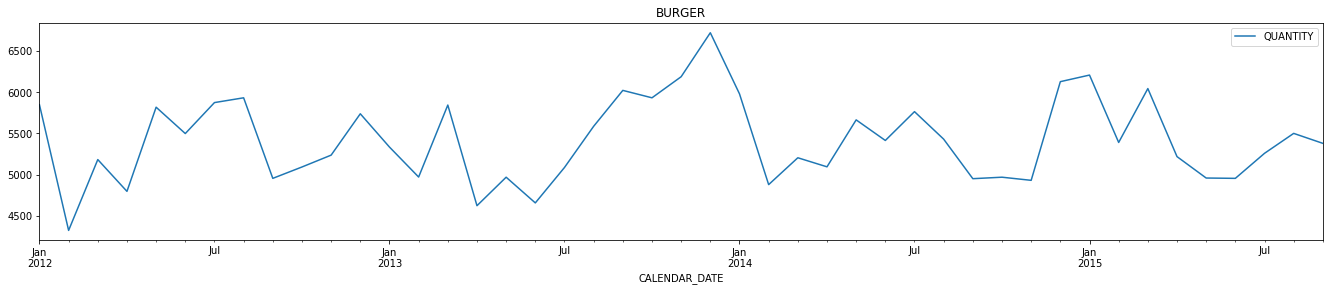

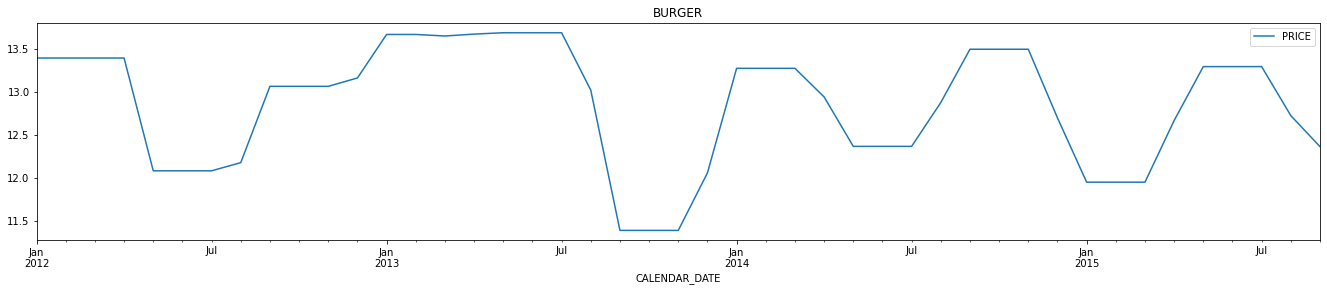

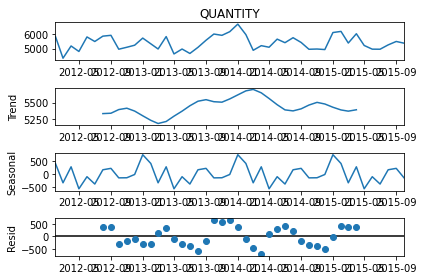

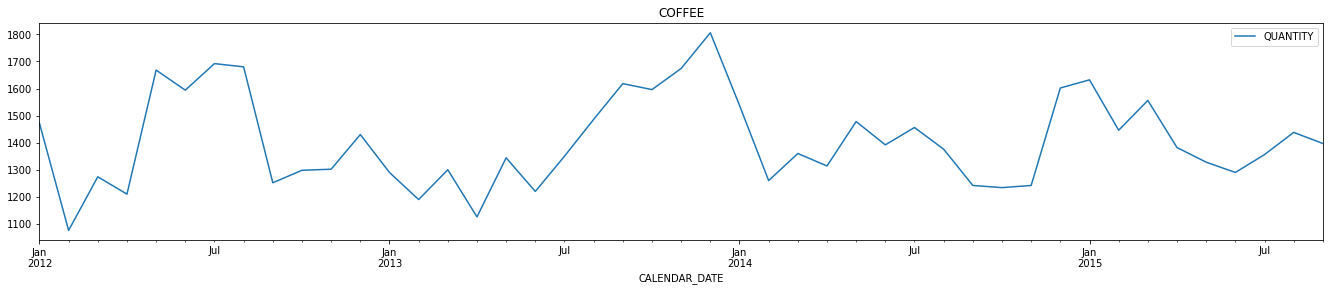

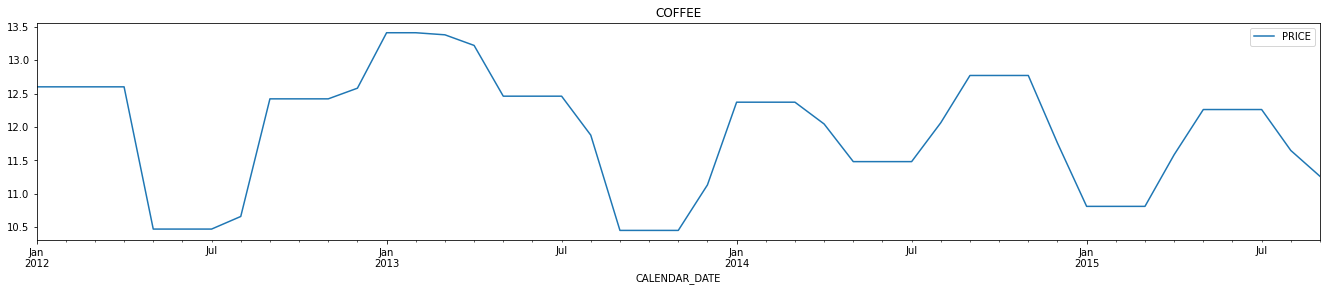

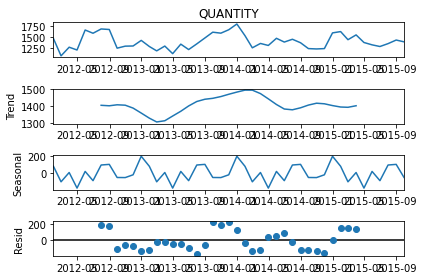

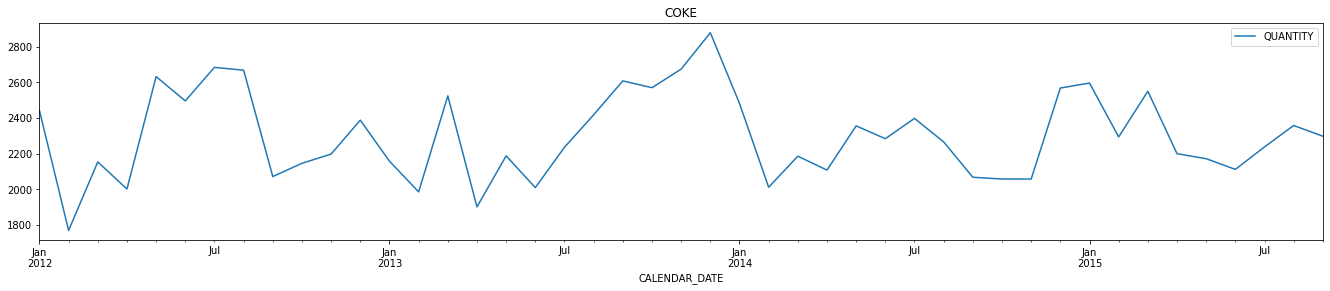

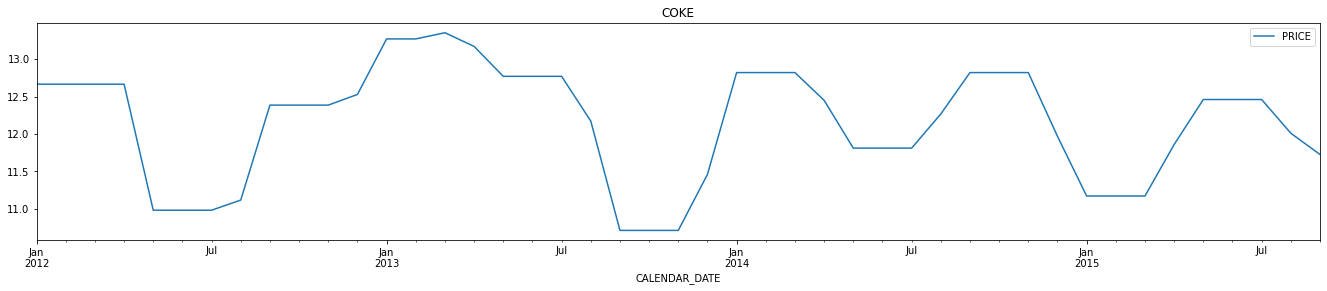

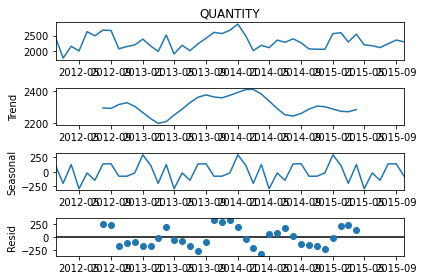

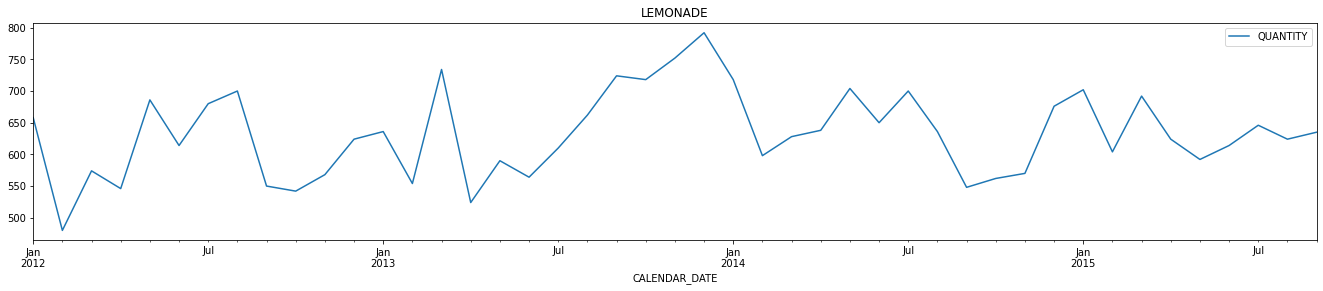

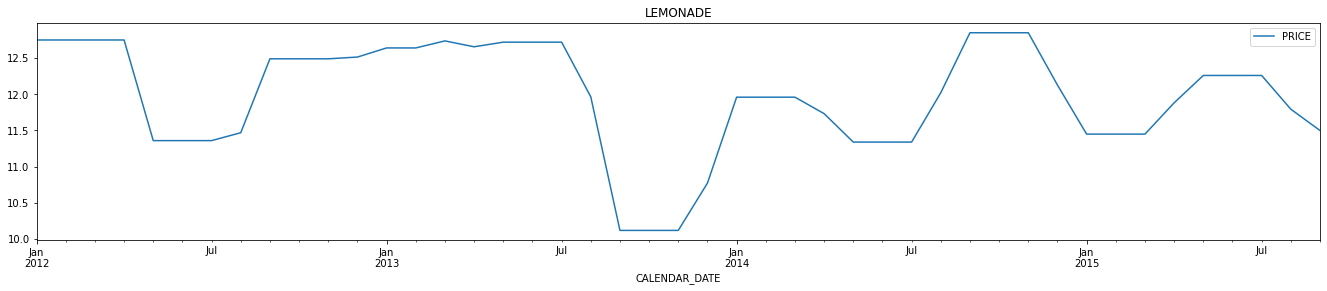

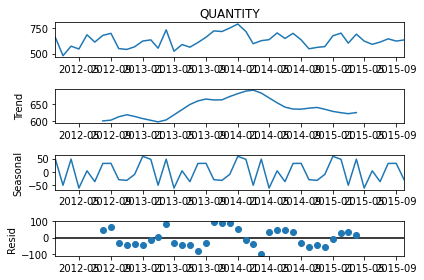

WEEKLY PLOTS::::::::::::::::::::
61 4.74064769162561


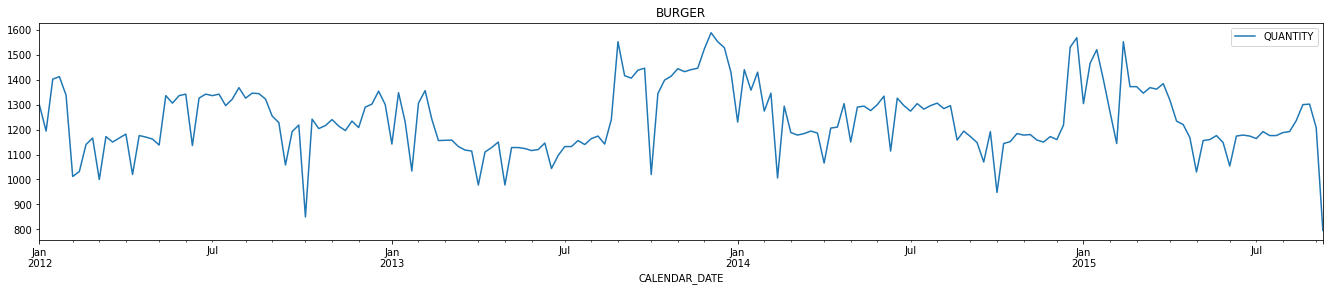

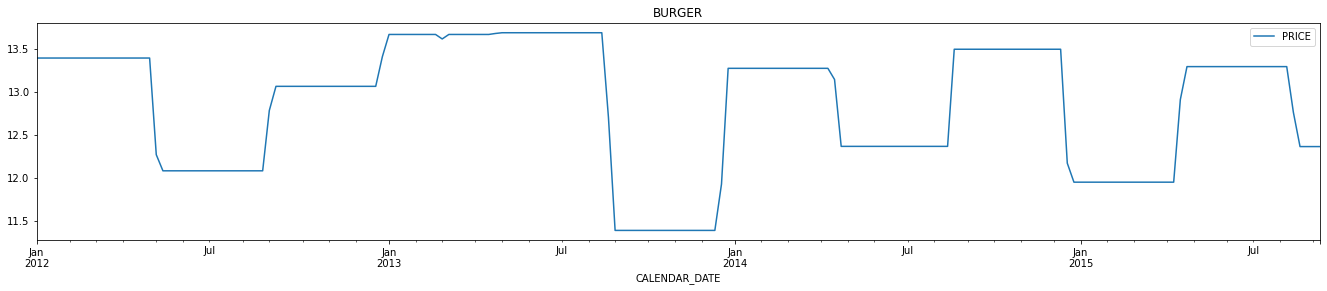

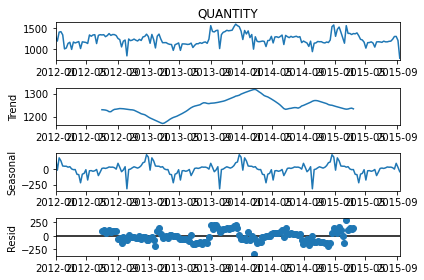

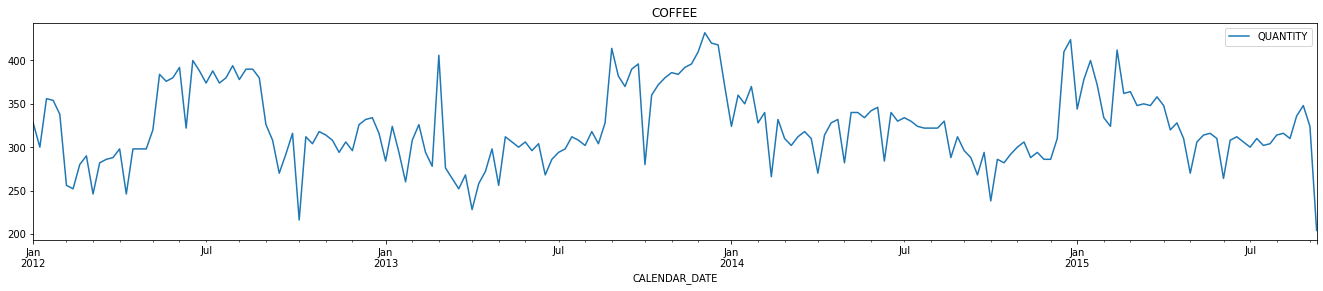

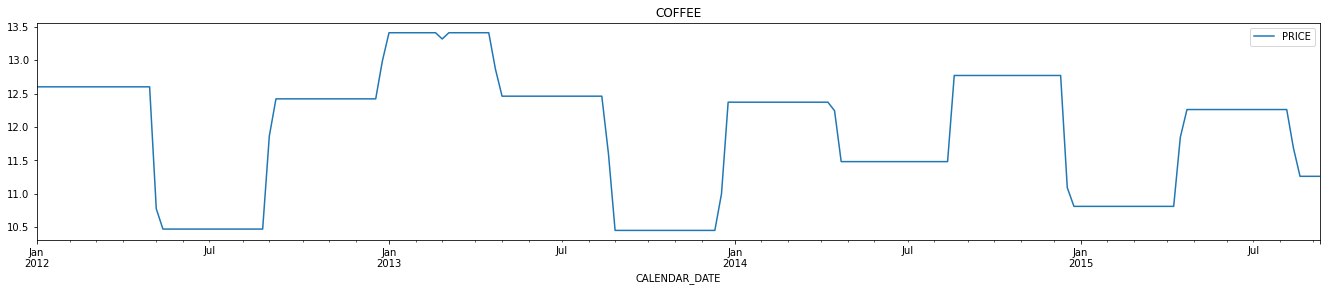

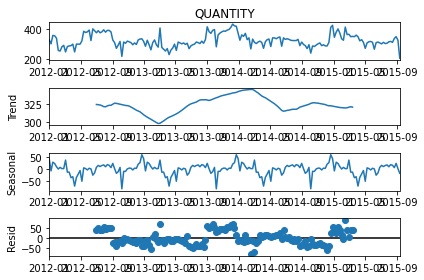

61 5.902211523103994


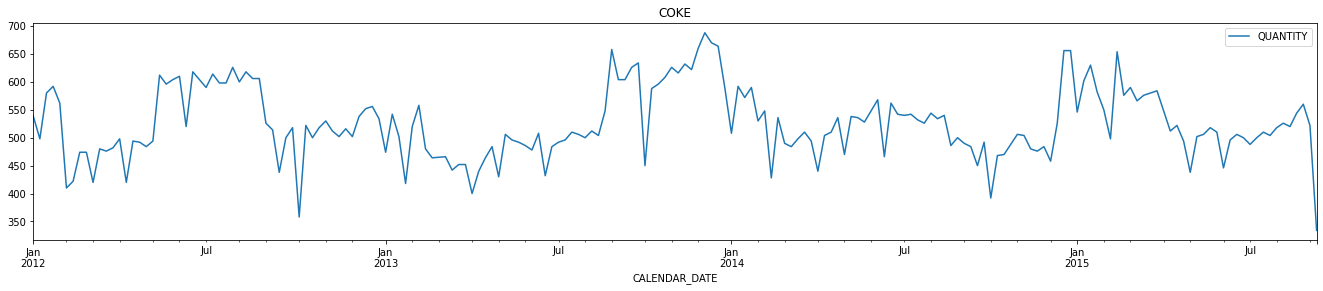

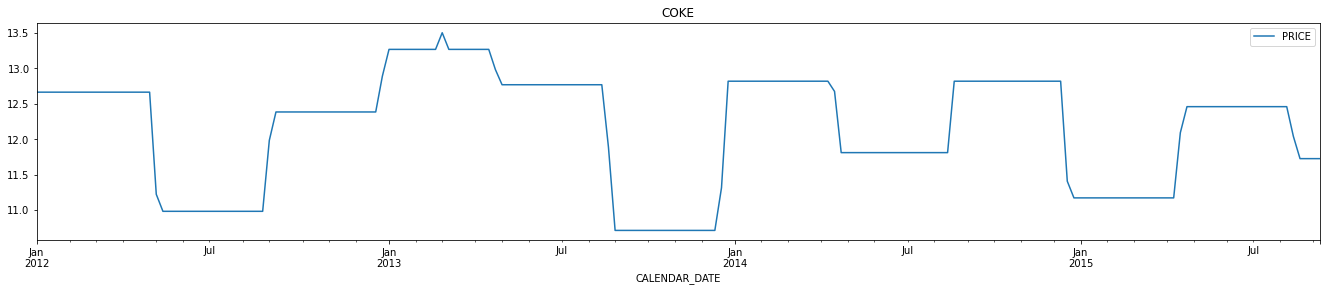

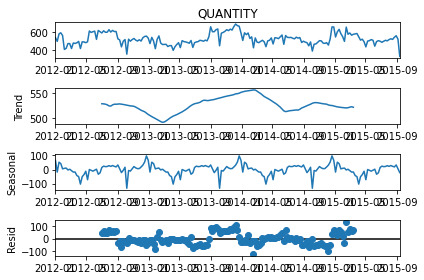

61 7.119887430959248


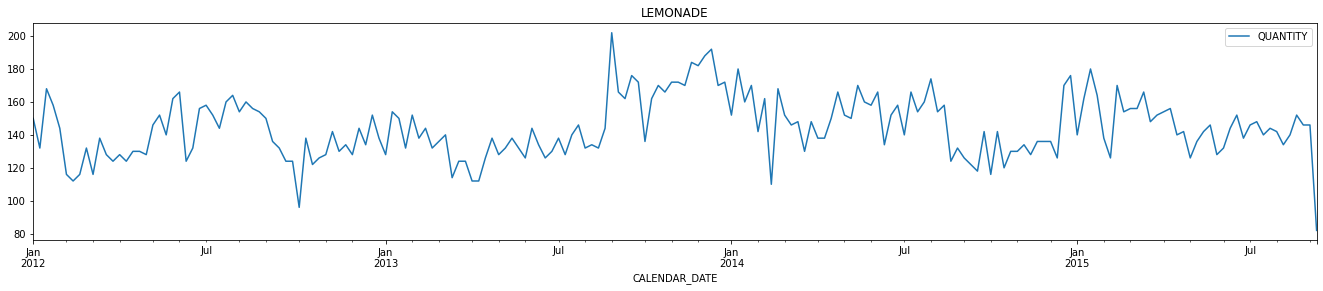

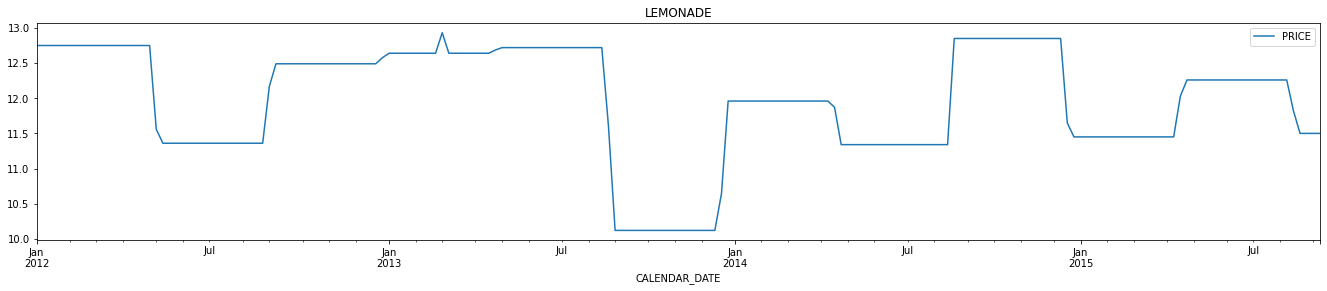

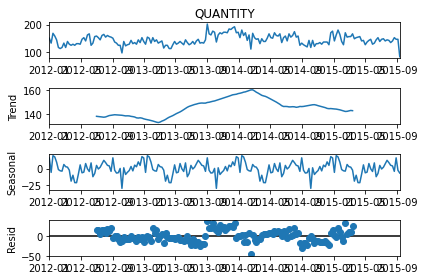

DAILY PLOTS::::::::::::::::::::
59 -4.2178355813798465
425 21.107107293997515


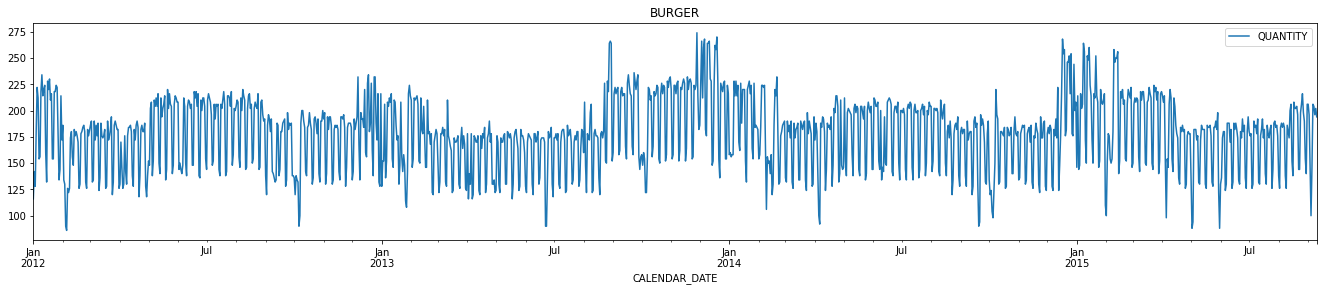

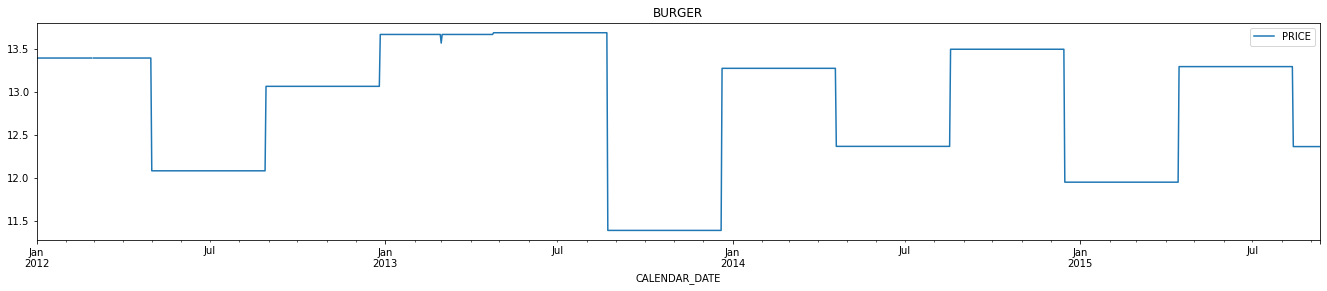

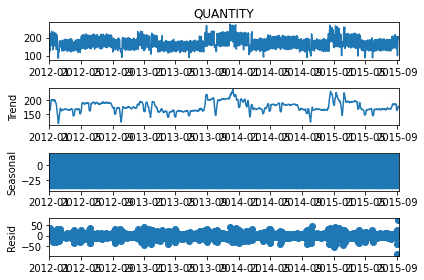

59 -4.314819320175835
425 12.490718138522618


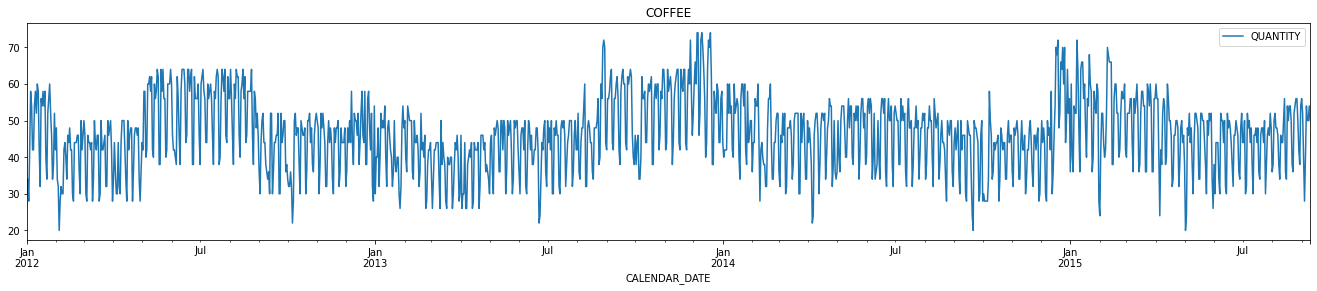

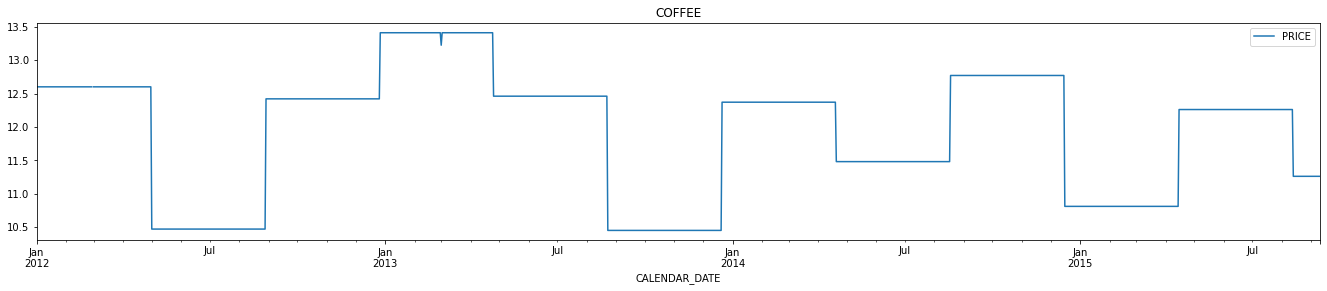

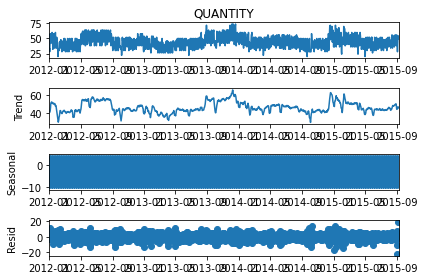

59 -3.572192828929052
425 25.359856666331392


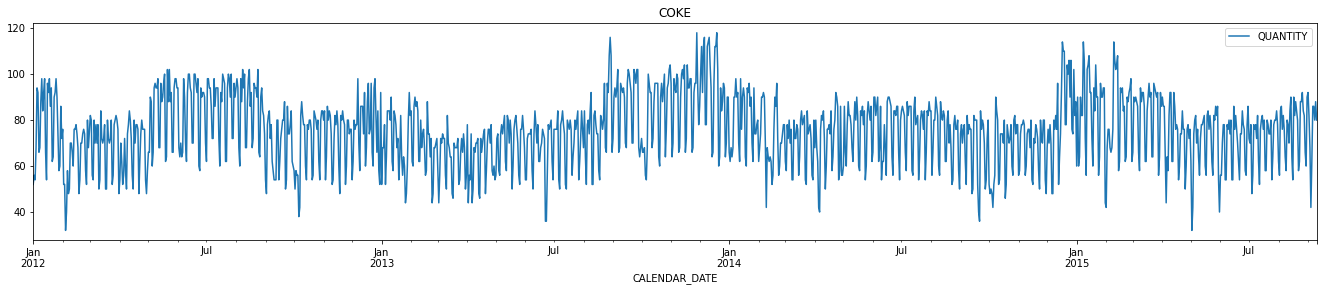

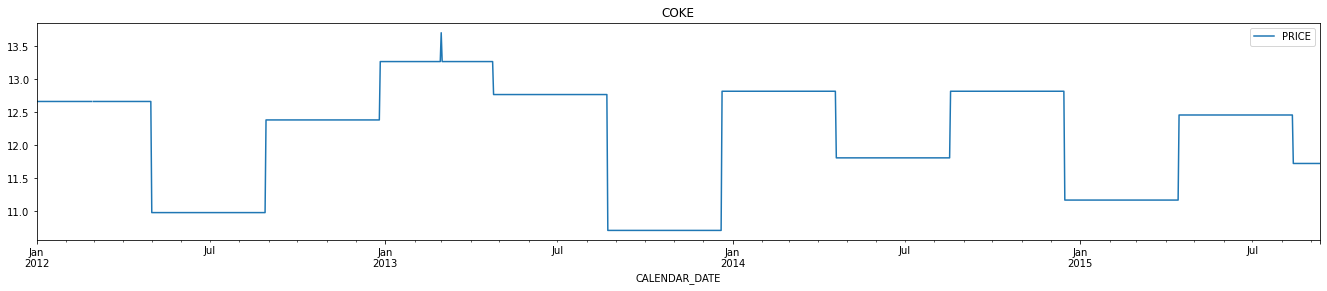

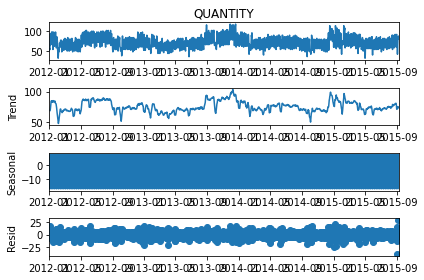

59 -3.194884696435186
425 26.34816048222546


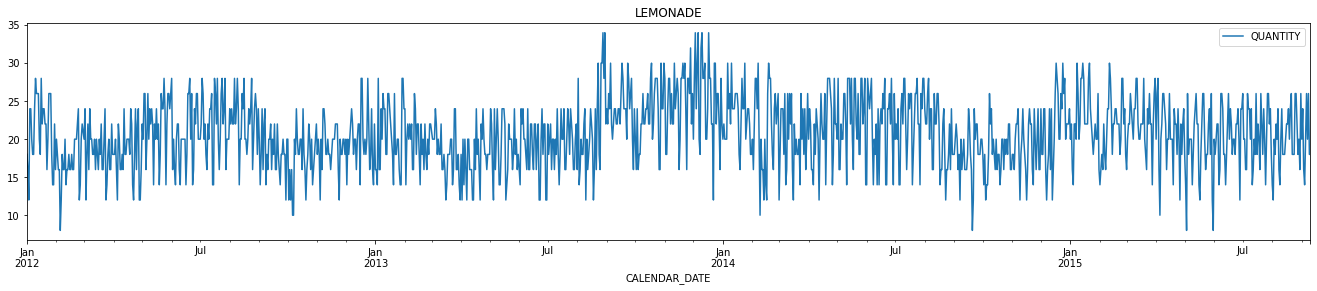

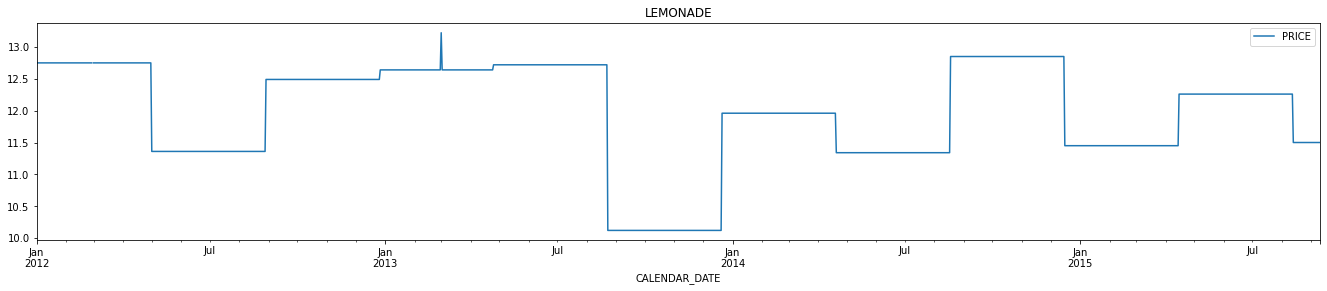

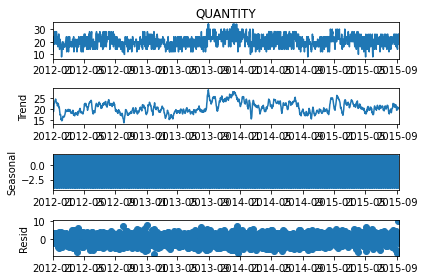

In [29]:
from pandas import(Grouper)
from scipy.stats import zscore
import statsmodels.api as sm
byitem= fin.groupby('ITEM_NAME')
#byitem = fin.set_index('CALENDAR_DATE').groupby(Grouper(freq='M'))['QUANTITY'].sum()
print('MONTHLY PLOTS::::::::::::::::::::')
for grp,item in byitem:
    grpdf = pd.DataFrame(item)
    grpm = grpdf.set_index(pd.DatetimeIndex(grpdf['CALENDAR_DATE'])).groupby(Grouper(freq='M')).agg({'QUANTITY':'sum','PRICE':'mean'}).reset_index()
    grpm.QUANTITY = outtrt(grpm,'QUANTITY')
    grpm.plot(x='CALENDAR_DATE',y='QUANTITY',figsize=(23,4),title=grp)
    grpm.plot(x='CALENDAR_DATE',y='PRICE',figsize=(23,4),title=grp)
    decomp = sm.tsa.seasonal_decompose(grpm.set_index('CALENDAR_DATE')['QUANTITY'])
    decomp.plot()
    plt.show()

print('WEEKLY PLOTS::::::::::::::::::::')    
for grp,item in byitem:
    grpdf = pd.DataFrame(item)
    grpm = grpdf.set_index(pd.DatetimeIndex(grpdf['CALENDAR_DATE'])).groupby(Grouper(freq='W')).agg({'QUANTITY':'sum','PRICE':'mean'}).reset_index()
    grpm.QUANTITY = outtrt(grpm,'QUANTITY')
    grpm.plot(x='CALENDAR_DATE',y='QUANTITY',figsize=(23,4),title=grp)
    grpm.plot(x='CALENDAR_DATE',y='PRICE',figsize=(23,4),title=grp)
    decomp = sm.tsa.seasonal_decompose(grpm.set_index('CALENDAR_DATE')['QUANTITY'])
    decomp.plot()
    plt.show()
    
print('DAILY PLOTS::::::::::::::::::::')  
for grp,item in byitem:
    grpdf = pd.DataFrame(item)
    grpm = grpdf.set_index(pd.DatetimeIndex(grpdf['CALENDAR_DATE'])).groupby(Grouper(freq='D')).agg({'QUANTITY':'sum','PRICE':'mean'}).reset_index()
    grpm.QUANTITY = outtrt(grpm,'QUANTITY')
    grpm.plot(x='CALENDAR_DATE',y='QUANTITY',figsize=(23,4),title=grp)
    grpm.plot(x='CALENDAR_DATE',y='PRICE',figsize=(23,4),title=grp)
    decomp = sm.tsa.seasonal_decompose(grpm.set_index('CALENDAR_DATE')['QUANTITY'])
    decomp.plot()
    plt.show()

424 21.236755544179452


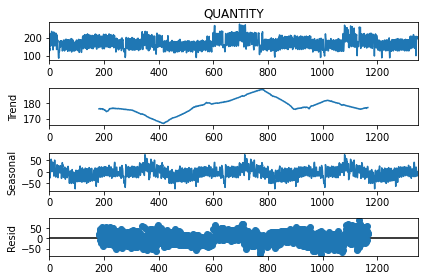

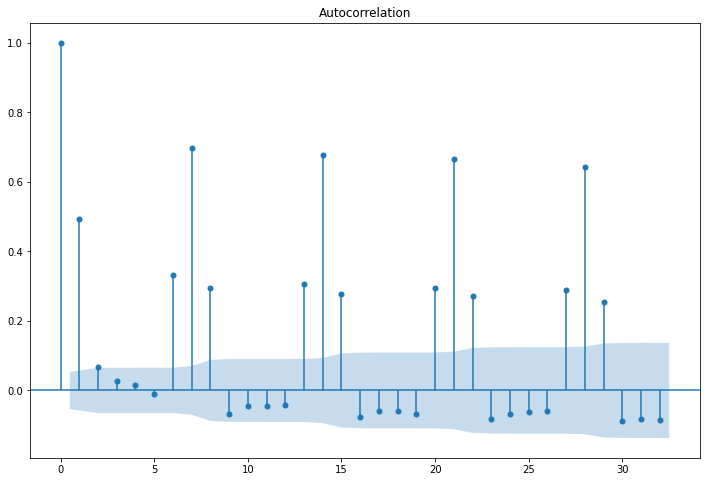

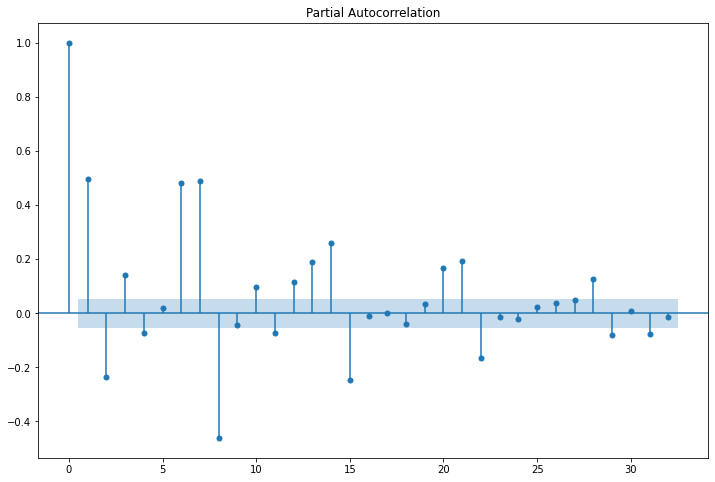

<AxesSubplot:>

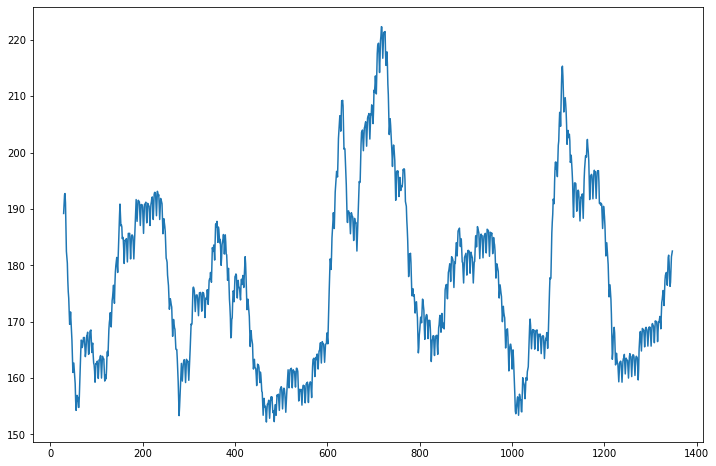

In [30]:
ff = fin.loc[fin.ITEM_NAME=='BURGER',['CALENDAR_DATE','QUANTITY']]
ff = ff.groupby(['CALENDAR_DATE'])['QUANTITY'].sum().reset_index()
ff.set_index(pd.DatetimeIndex(ff['CALENDAR_DATE']))
ff.QUANTITY = outtrt(ff,'QUANTITY')
decomp = sm.tsa.seasonal_decompose(ff.QUANTITY,period=365)
decomp.plot()
plt.rcParams['figure.figsize'] = [12,8]

from statsmodels.graphics import tsaplots
fig=tsaplots.plot_acf(ff['QUANTITY'])
fig=tsaplots.plot_pacf(ff['QUANTITY'])
plt.show()
ma=ff['QUANTITY'].rolling(window=30).mean()
mstd = ff['QUANTITY'].rolling(window=30).std()
ma.plot()

In [123]:
#fin.loc[fin['YEAR']==2014,'QUANTITY'] # loc means exact address of a cell. So be careful while subsetting
#fin.loc[fin.YEAR == 2014,'QUANTITY']

yr14 = fin.query('YEAR==2014')

yr14

STORE CALENDAR_DATE  PRICE  QUANTITY  SELL_ID  SELL_CATEGORY  ITEM_ID ITEM_NAME  YEAR               HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR MONTH  DAY WEEK WEEKDAY
5896      1    2014-01-01  15.50        72     1070              0     7821    BURGER  2014              New Year           0               0                 19.4           0   Jan    1   00     Wed
5897      1    2014-01-01  13.27        22     2051              2     7821    BURGER  2014              New Year           0               0                 19.4           0   Jan    1   00     Wed
5898      1    2014-01-01  13.27        22     2051              2     5030      COKE  2014              New Year           0               0                 19.4           0   Jan    1   00     Wed
5899      1    2014-01-01  11.96        20     2052              2     7821    BURGER  2014              New Year           0               0                 19.4           0   Jan    1   00     Wed
5900      1    2014-01-01  11.96        20     2052              2     6249  LEMONADE  2014              New Year           0               0                 19.4           0   Jan    1   00     Wed
5901      1    2014-01-01  12.37        44     2053              2     7821    BURGER  2014              New Year           0               0                 19.4           0   Jan    1   00     Wed
5902      1    2014-01-01  12.37        44     2053              2     5030      COKE  2014              New Year           0               0                 19.4           0   Jan    1   00     Wed
5903      1    2014-01-01  12.37        44     2053              2     3052    COFFEE  2014              New Year           0               0                 19.4           0   Jan    1   00     Wed
5904      1    2014-01-02  15.50        76     1070              0     7821    BURGER  2014              New Year           0               0                 14.0           0   Jan    2   00     Thu
5905      1    2014-01-02  13.27        22     2051              2     7821    BURGER  2014              New Year           0               0                 14.0           0   Jan    2   00     Thu
5906      1    2014-01-02  13.27        22     2051              2     5030      COKE  2014              New Year           0               0                 14.0           0   Jan    2   00     Thu
5907      1    2014-01-02  11.96        22     2052              2     7821    BURGER  2014              New Year           0               0                 14.0           0   Jan    2   00     Thu
5908      1    2014-01-02  11.96        22     2052              2     6249  LEMONADE  2014              New Year           0               0                 14.0           0   Jan    2   00     Thu
5909      1    2014-01-02  12.37        40     2053              2     7821    BURGER  2014              New Year           0               0                 14.0           0   Jan    2   00     Thu
5910      1    2014-01-02  12.37        40     2053              2     5030      COKE  2014              New Year           0               0                 14.0           0   Jan    2   00     Thu
5911      1    2014-01-02  12.37        40     2053              2     3052    COFFEE  2014              New Year           0               0                 14.0           0   Jan    2   00     Thu
5912      1    2014-01-03  15.50        68     1070              0     7821    BURGER  2014              New Year           0               0                 17.6           0   Jan    3   00     Fri
5913      1    2014-01-03  13.27        26     2051              2     7821    BURGER  2014              New Year           0               0                 17.6           0   Jan    3   00     Fri
5914      1    2014-01-03  13.27        26     2051              2     5030      COKE  2014              New Year           0               0                 17.6           0   Jan    3   00     Fri
5915      1    2014-01-03 

In [32]:
from sklearn.neighbors import LocalOutlierFactor

def outtrt1(df,col,yr):
    lof=LocalOutlierFactor(n_neighbors=10)
    return(lof.fit_predict(df.loc[df['YEAR']==yr,col]))

outtrt1(fin,'QUANTITY',2014)

In [33]:
zscore(fin.QUANTITY)[3]

-1.046888312810399

In [ ]:
# fin.sort_values(['ITEM_NAME','QUANTITY'],ascending=[True,False])

In [ ]:
#fin.groupby(['ITEM_NAME','WEEKDAY'])['QUANTITY'].sum()

In [34]:
fin[(fin.CALENDAR_DATE.dt.month == 3) & (fin.CALENDAR_DATE.dt.year == 2013)].sort_values(['ITEM_NAME','CALENDAR_DATE'])[fin.ITEM_NAME=='COFFEE']

<ipython-input-34-02c1e608be5c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fin[(fin.CALENDAR_DATE.dt.month == 3) & (fin.CALENDAR_DATE.dt.year == 2013)].sort_values(['ITEM_NAME','CALENDAR_DATE'])[fin.ITEM_NAME=='COFFEE']


STORE CALENDAR_DATE  PRICE  QUANTITY  SELL_ID  SELL_CATEGORY  ITEM_ID ITEM_NAME  YEAR HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR MONTH  DAY WEEK WEEKDAY
3406      1    2013-03-01  13.13        26     2053              2     3052    COFFEE  2013     NaN           0               0                 39.2           1   Mar    1   08     Fri
3407      1    2013-03-01  13.13        26     2053              2     3052    COFFEE  2013     NaN           0               0                 32.0           1   Mar    1   08     Fri
3422      1    2013-03-01  13.41        40     2053              2     3052    COFFEE  2013     NaN           0               0                 39.2           1   Mar    1   08     Fri
3423      1    2013-03-01  13.41        40     2053              2     3052    COFFEE  2013     NaN           0               0                 32.0           1   Mar    1   08     Fri
3438      1    2013-03-01  13.13        24     2053              2     3052    COFFEE  2013     NaN           0               0                 39.2           1   Mar    1   08     Fri
3439      1    2013-03-01  13.13        24     2053              2     3052    COFFEE  2013     NaN           0               0                 32.0           1   Mar    1   08     Fri
3463      1    2013-03-02  13.41        26     2053              2     3052    COFFEE  2013     NaN           1               0                 35.6           1   Mar    2   08     Sat
3471      1    2013-03-03  13.41        34     2053              2     3052    COFFEE  2013     NaN           1               0                 33.8           1   Mar    3   09     Sun
3479      1    2013-03-04  13.41        42     2053              2     3052    COFFEE  2013     NaN           0               0                 35.6           1   Mar    4   09     Mon
3487      1    2013-03-05  13.41        42     2053              2     3052    COFFEE  2013     NaN           0               0                 35.6           1   Mar    5   09     Tue
3495      1    2013-03-06  13.41        44     2053              2     3052    COFFEE  2013     NaN           0               0                 39.2           1   Mar    6   09     Wed
3503      1    2013-03-07  13.41        44     2053              2     3052    COFFEE  2013     NaN           0               0                 39.2           1   Mar    7   09     Thu
3511      1    2013-03-08  13.41        44     2053              2     3052    COFFEE  2013     NaN           0               0                 32.0           1   Mar    8   09     Fri
3519      1    2013-03-09  13.41        34     2053              2     3052    COFFEE  2013     NaN           1               0                 33.8           1   Mar    9   09     Sat
3527      1    2013-03-10  13.41        26     2053              2     3052    COFFEE  2013     NaN           1               0                 33.8           1   Mar   10   10     Sun
3535      1    2013-03-11  13.41        50     2053              2     3052    COFFEE  2013     NaN           0               0                 32.0           0   Mar   11   10     Mon
3543      1    2013-03-12  13.41        38     2053              2     3052    COFFEE  2013     NaN           0               0                 37.4           1   Mar   12   10     Tue
3551      1    2013-03-13  13.41        44     2053              2     3052    COFFEE  2013     NaN           0               0                 42.8           1   Mar   13   10     Wed
3559      1    2013-03-14  13.41        40     2053              2     3052    COFFEE  2013     NaN           0               0                 42.8           1   Mar   14   10     Thu
3567      1    2013-03-15  13.41        38     2053              2     3052    COFFEE  2013     NaN           0               0                 44.6           1   Mar   15   10     Fri
3575      1    2013-03-16  13.41        28     2053              2     3052    COFFEE  2013     NaN           1          

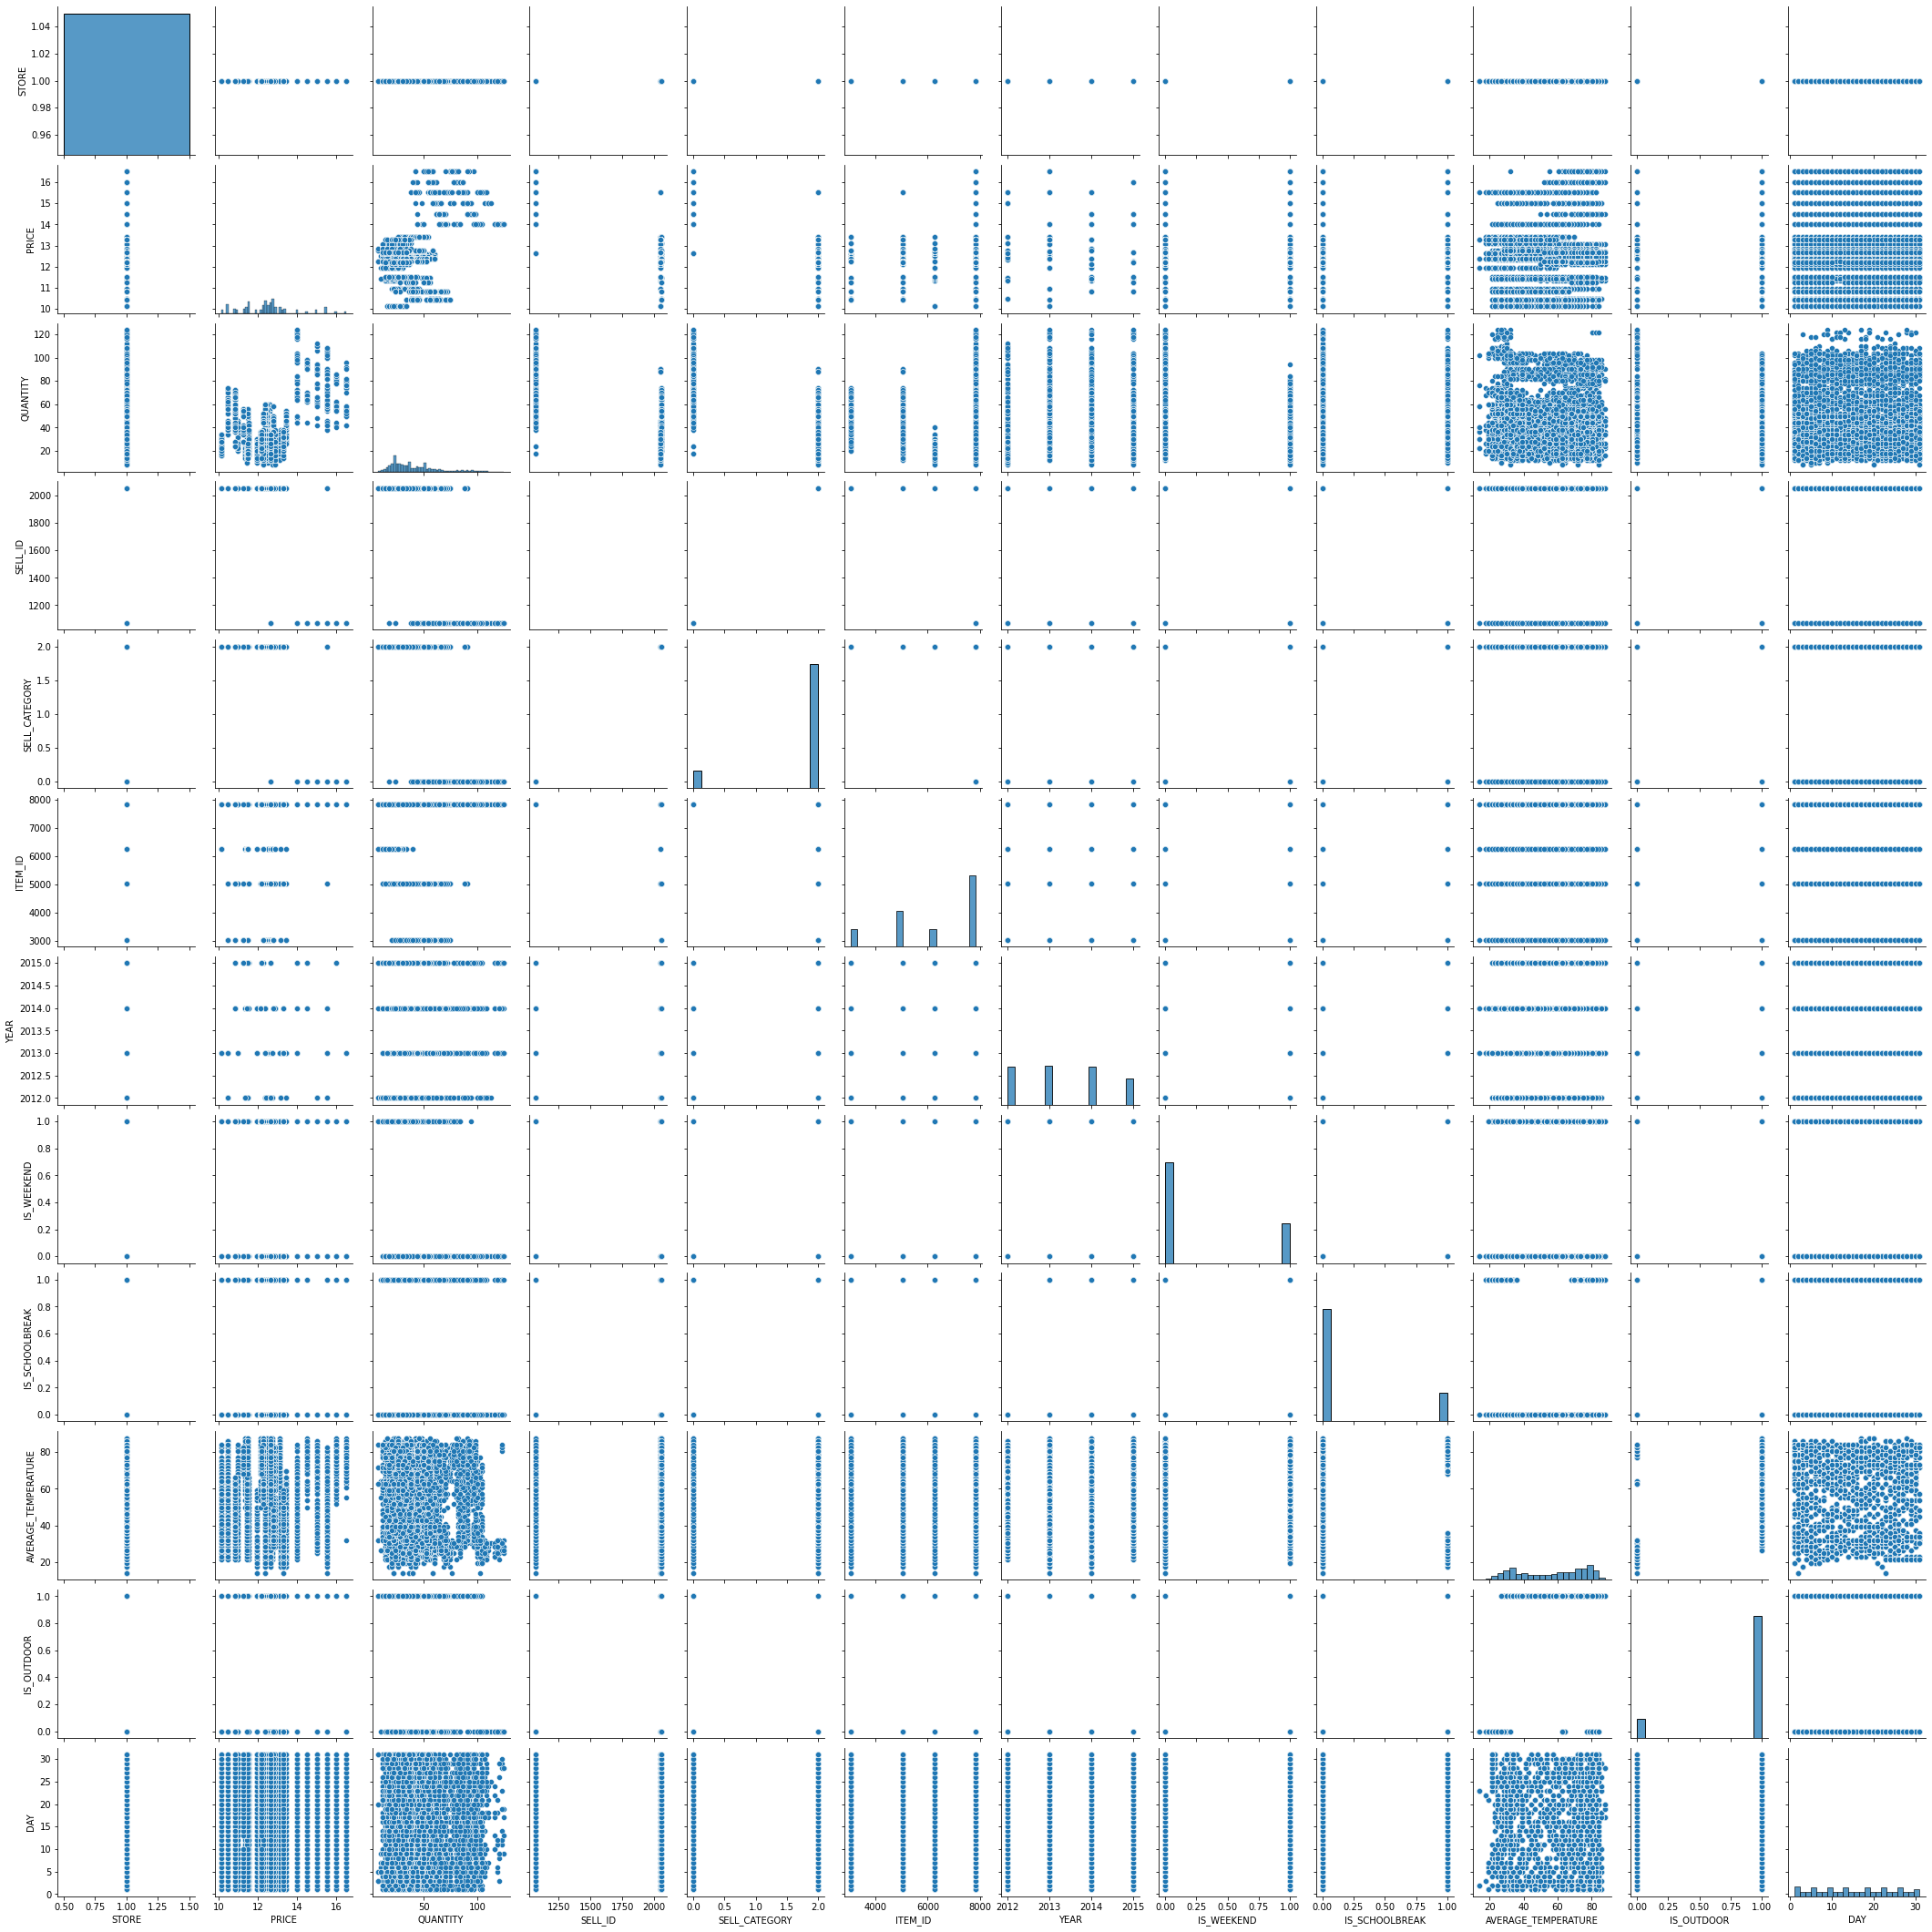

In [35]:
import seaborn as sns
sns.pairplot(fin)

In [37]:
grps = fin.groupby(['ITEM_NAME','YEAR','MONTH','WEEK']).agg({'QUANTITY':sum,'PRICE':'mean','AVERAGE_TEMPERATURE':'mean'}).reset_index()

brg = grps.query("YEAR==2013 and ITEM_NAME == 'BURGER'")

print(brg.head(10))

#brg.loc[:,'QUANTITY'] = outtrt(brg,'QUANTITY')

# brg[brg.QUANTITY==brg.QUANTITY.max()]

#sns.scatterplot('PRICE','QUANTITY',data=brg,hue='SELL_ID')

# for x in brg.SELL_ID.unique():
#     brg[brg.SELL_ID==x].plot(kind='scatter',x='PRICE',y='QUANTITY',title=x)
#     plt.show()                                                                    

   ITEM_NAME  YEAR MONTH WEEK  QUANTITY      PRICE  AVERAGE_TEMPERATURE
62    BURGER  2013   Apr   13       858  13.670000            50.900000
63    BURGER  2013   Apr   14      1110  13.670000            61.314286
64    BURGER  2013   Apr   15      1118  13.670000            65.171429
65    BURGER  2013   Apr   16      1150  13.678571            56.685714
66    BURGER  2013   Apr   17       386  13.690000            63.200000
67    BURGER  2013   Aug   30       516  13.690000            75.800000
68    BURGER  2013   Aug   31      1172  13.690000            81.371429
69    BURGER  2013   Aug   32      1146  13.690000            77.000000
70    BURGER  2013   Aug   33      1210  13.031429            75.200000
71    BURGER  2013   Aug   34      1542  11.385000            79.314286


In [58]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [39]:
%%R 
X=c(1,4,5,7)
Y=c(2,4,3,9)
summary(lm(Y~X))


Call:
lm(formula = Y ~ X)

Residuals:
    1     2     3     4 
 0.88 -0.24 -2.28  1.64 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.0800     2.3000   0.035    0.975
X             1.0400     0.4822   2.157    0.164

Residual standard error: 2.088 on 2 degrees of freedom
Multiple R-squared:  0.6993,	Adjusted R-squared:  0.549 
F-statistic: 4.651 on 1 and 2 DF,  p-value: 0.1638



In [42]:
%Rpush brg

%R head(brg)

#%R makeDataReport(fin)

#%R lst = split(fin, fin$ITEM_NAME)

#%R tsoutliers::locate.outliers(fin$QUANTITY)

#%R tsoutliers::locate.outliers(fin[fin$ITEM_NAME='BURGER'$QUANTITY)

#%R forecast::auto.arima(lst$BURGER$QUANTITY)$coef

ITEM_NAME  YEAR MONTH WEEK  QUANTITY      PRICE  AVERAGE_TEMPERATURE
62    BURGER  2013   Apr   13       858  13.670000            50.900000
63    BURGER  2013   Apr   14      1110  13.670000            61.314286
64    BURGER  2013   Apr   15      1118  13.670000            65.171429
65    BURGER  2013   Apr   16      1150  13.678571            56.685714
66    BURGER  2013   Apr   17       386  13.690000            63.200000
67    BURGER  2013   Aug   30       516  13.690000            75.800000


Call:
lm(formula = PRICE ~ QUANTITY + SELL_ID + IS_WEEKEND + YEAR + 
    MONTH + AVERAGE_TEMPERATURE, data = brg)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9393 -0.5181  0.1253  0.4748  1.4374 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2.753e+02  7.298e+01   3.772 0.000185 ***
QUANTITY            -3.005e-04  1.201e-04  -2.503 0.012700 *  
SELL_ID             -3.257e-03  1.066e-04 -30.538  < 2e-16 ***
IS_WEEKEND          -1.738e-01  9.970e-02  -1.743 0.082117 .  
YEAR                -1.264e-01  3.635e-02  -3.478 0.000558 ***
MONTHAug             5.093e-02  3.516e-01   0.145 0.884903    
MONTHDec            -1.265e+00  4.510e-01  -2.805 0.005271 ** 
MONTHFeb            -8.585e-01  4.277e-01  -2.007 0.045358 *  
MONTHJan            -9.062e-01  4.592e-01  -1.974 0.049101 *  
MONTHJul             2.537e-01  3.748e-01   0.677 0.498772    
MONTHJun             2.192e-01  3.146e-01   0.697 0.486284    
MONTHMar            

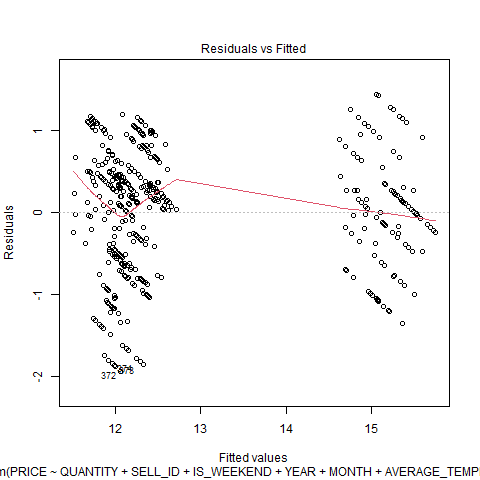

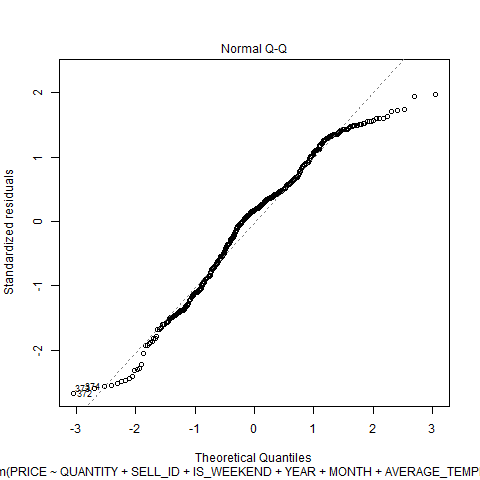

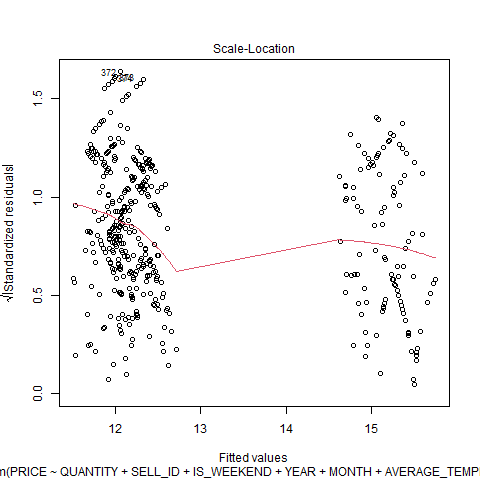

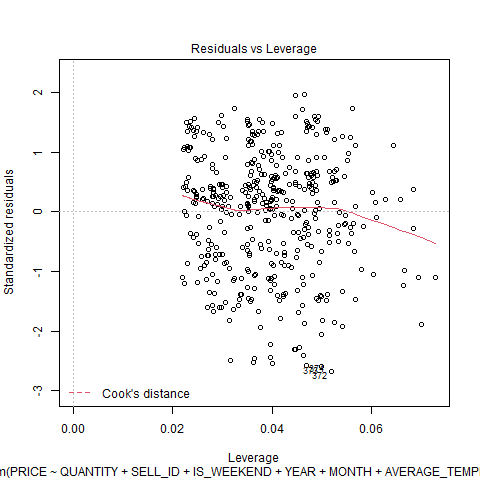

In [254]:
%%R

x<- lm(PRICE ~ QUANTITY+SELL_ID+IS_WEEKEND+YEAR+MONTH+AVERAGE_TEMPERATURE,data=brg)

print(summary(x))

plot(x)
#plot(lm(fin$PRICE ~ .,data=fin))

In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(brg[brg.columns.drop('PRICE')],brg['PRICE'])

In [59]:
print(meta.sort_values('SELL_ID'))
price.groupby(['SELL_ID','SELL_CATEGORY'])['PRICE','QUANTITY'].describe()
fin.head()

    SELL_ID  SELL_CATEGORY  ITEM_ID ITEM_NAME
0      1070              0     7821    BURGER
4      2051              2     7821    BURGER
5      2051              2     5030      COKE
6      2052              2     7821    BURGER
7      2052              2     6249  LEMONADE
8      2053              2     7821    BURGER
9      2053              2     5030      COKE
10     2053              2     3052    COFFEE
3      3028              0     6249  LEMONADE
1      3055              0     3052    COFFEE
2      3067              0     5030      COKE


STORE CALENDAR_DATE  PRICE  QUANTITY  SELL_ID  SELL_CATEGORY  ITEM_ID ITEM_NAME  YEAR   HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR MONTH  DAY WEEK WEEKDAY
0      1    2012-01-01  15.50        46     1070              0     7821    BURGER  2012  New Year           1               0                 24.8           0   Jan    1   01     Sun
1      1    2012-01-01  12.73        22     2051              2     7821    BURGER  2012  New Year           1               0                 24.8           0   Jan    1   01     Sun
2      1    2012-01-01  12.73        22     2051              2     5030      COKE  2012  New Year           1               0                 24.8           0   Jan    1   01     Sun
3      1    2012-01-01  12.75        18     2052              2     7821    BURGER  2012  New Year           1               0                 24.8           0   Jan    1   01     Sun
4      1    2012-01-01  12.75        18     2052              2     6249  LEMONADE  2012  New Year           1               0                 24.8           0   Jan    1   01     Sun

In [46]:
print("ALL DATES-----",'\n',pd.DataFrame([(col,dates[col].isna().sum(),dates[col].mode(),dates[col].nunique())for col in dates],
                               columns=['Name','Miss','Mode','Unique']),'\n')

NameError: name 'dates' is not defined

In [47]:
crit = price.std()==0
crit.index[crit]
price[crit.index[crit]]

num = price.select_dtypes('int64')
[col for col in num if num[col].std() == 0]
[col for col in num if num[col].std()>0]
[col for col in num.columns]
price.SELL_ID.unique()

array([1070, 2051, 2052, 2053], dtype=int64)

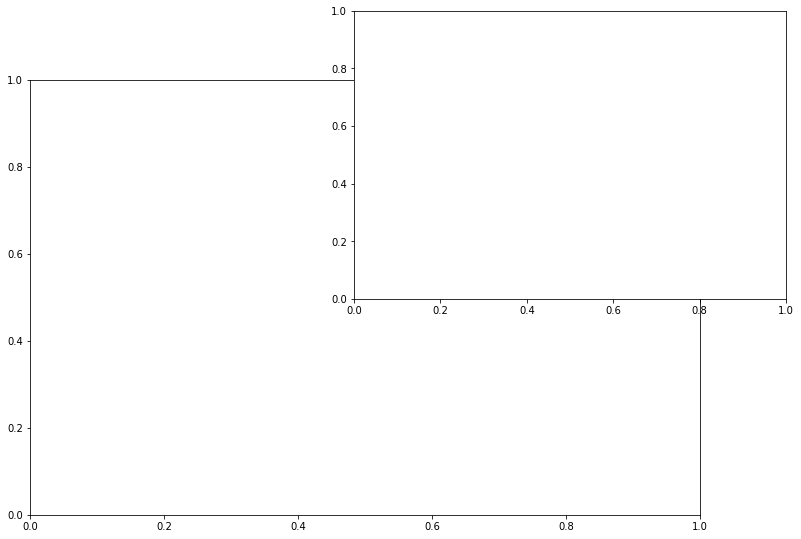

In [48]:
ax1 = plt.axes()
ax2 = plt.axes([0.5,0.5,0.5,0.5])

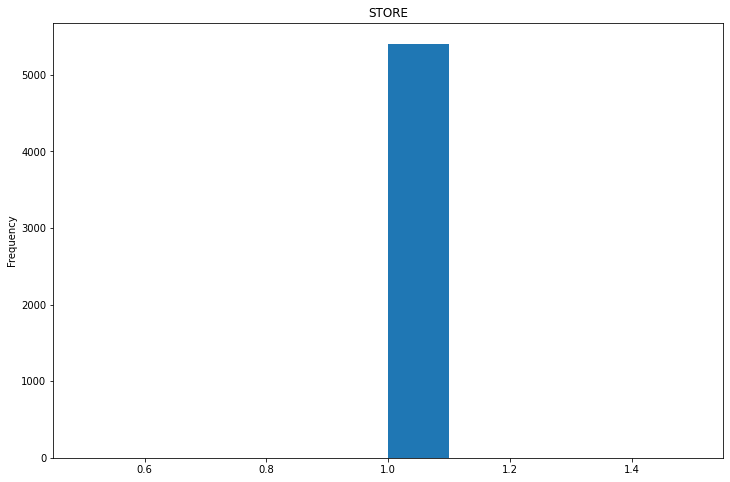

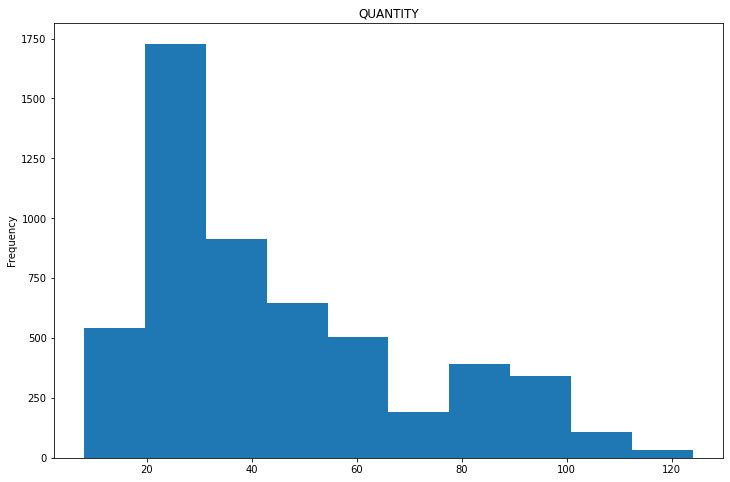

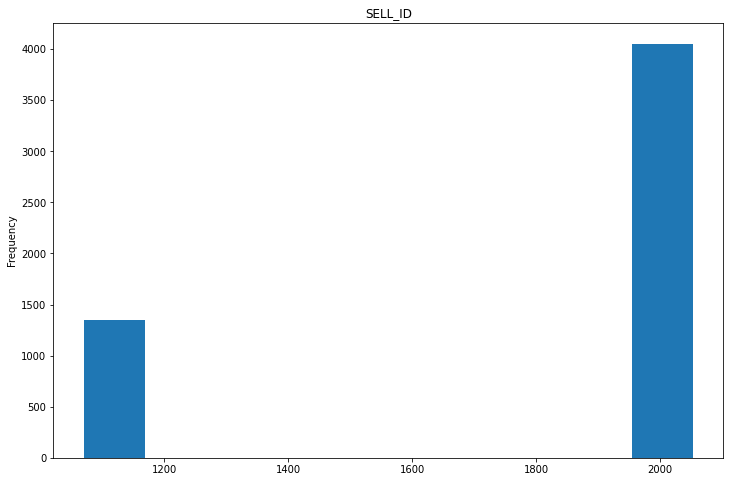

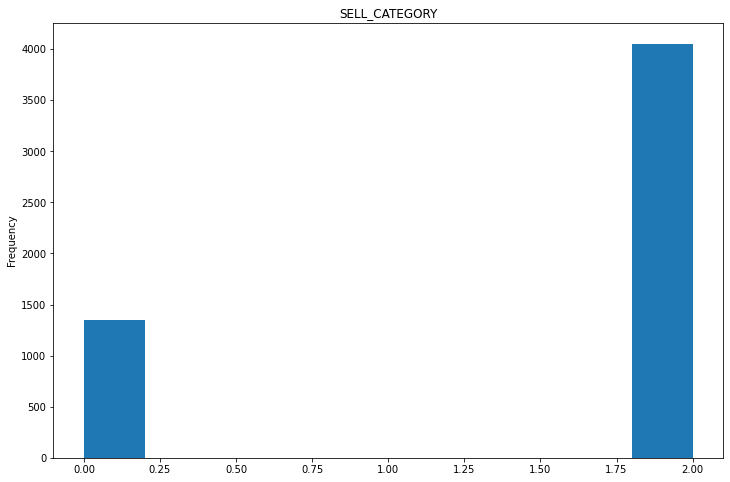

In [49]:
for col in num:
    num[col].plot(kind='hist',title=col)
    plt.show()

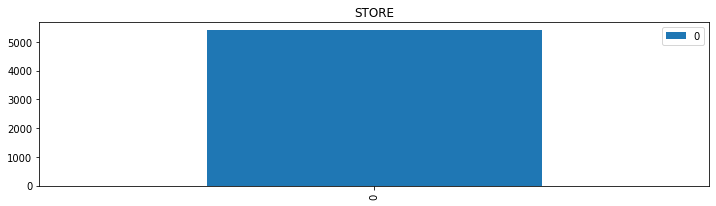

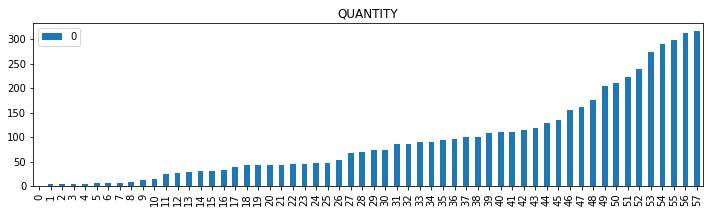

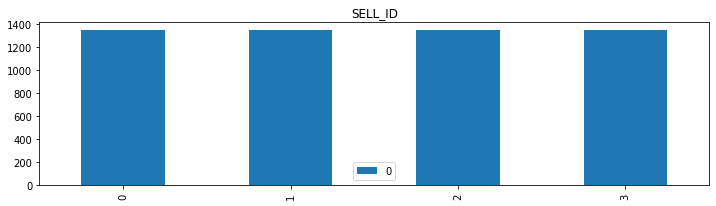

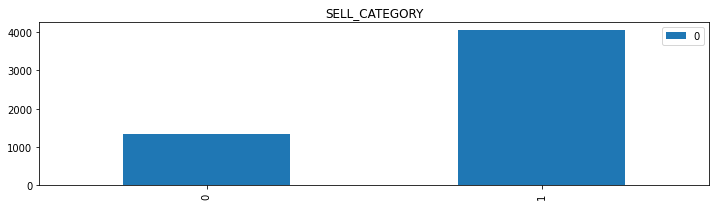

In [50]:
for col in num:
    pd.DataFrame(sorted(num[col].value_counts(sort=False))).plot(kind='bar',figsize=(12,3),title=col)
    plt.show()

In [52]:
data = robjects.r('read.csv(file ="C:/Users/Ashis/Dropbox/My PC (LAPTOP-05U11M48)/Downloads/Cafe - Transaction - Store.csv", header = T)')

#dm = rpackages.importr('dataMaid')

data.head()

In [53]:
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [60]:
packageNames = ('tsclean','dataMaid')
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)

packnames_to_install = [x for x in packageNames if not rpackages.isinstalled(x)]

# Running R in Python example installing packages:
if len(packnames_to_install) > 0:
    utils.install_packages(StrVector(packnames_to_install))

R[write to console]: Installing package into 'C:/Users/Ashis/Dropbox/My PC (LAPTOP-05U11M48)/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

